#2022-04-27 머신러닝 실습

In [2]:
#베이즈 분류기 구현하기
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

viagra_spam = {'viagra':
[1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1],
'spam':
[1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1]}  #리스트 변수 지정

df=pd.DataFrame(viagra_spam,columns=['viagra','spam']) #데이터 프레임 작성
np_data=df.values

In [3]:
#𝑃(𝑣𝑖𝑎𝑔𝑟𝑎 ∩ 𝑠𝑝𝑎𝑚)
sum((np_data[:,0]==1)&(np_data[:,1]==1))/20 #0번째 열과 1번째 열이 모두 1일경우 

0.15

In [14]:
#𝑃(𝑣𝑖𝑎𝑔𝑟𝑎), 𝑃(𝑠𝑝𝑎𝑚), 𝑃(𝑣𝑖𝑎𝑔𝑟𝑎) ∩ 𝑠𝑝𝑎𝑚), 𝑃(~𝑣𝑖𝑎𝑔𝑟𝑎 ∩ 𝑠𝑝𝑎𝑚)
p_viagra=sum(np_data[:,0]==1)/len(np_data)
p_viagra
p_spam=sum(np_data[:,1]==1)/len(np_data)
p_spam
p_v_cap_s=sum((np_data[:,0]==1)&(np_data[:,1]==1))/len(np_data)
p_v_cap_s
p_n_v_cap_s = sum((np_data[:, 0] == 0) & (np_data[:, 1] == 1)) /len(np_data)
p_n_v_cap_s

0.15

In [11]:
#𝑃(𝑠𝑝𝑎𝑚|𝑣𝑖𝑎𝑔𝑟𝑎)
p_spam * (p_v_cap_s / p_spam ) / p_viagra

0.5

In [12]:
#𝑃(𝑠𝑝𝑎𝑚|~𝑣𝑖𝑎𝑔𝑟𝑎)
p_spam * (p_n_v_cap_s / p_spam ) / (1-p_viagra)

0.2142857142857143

– ‘viagra’라는 단어가 포함되었을 때 스팸메일일 확률(=0.5)은
  ‘viagra’라는 단어가 포함되지 않았을 때 스팸메일일 확률
   (=0.2142857142857143)보다 높음
– ‘viagra’라는 단어가 있으면 스팸메일로 분류하는 것이 합리적
    • ‘viagra’라는 단어 외에 영향을 주는 단어가 있을 수 있다.
    • 오히려 스팸에서 제외되는 메일에 ‘viagra’라는 단어가 있을 수 있다.
– 나이브 베이지안 분류기가 위 문제점을 해결

In [15]:
#나이브 베이지안 분류기 만들기
#나이브 베이지안 분류기(Naive Bayesian Classifier) : 여러 개의 열을 사용하여 분류기를 구성
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

data_url="c:/source/ch11/fraud.csv" #파일 불러올 경로 호출
df=pd.read_csv(data_url,sep=',')
df.head()

,ID,History,CoApplicant,Accommodation,Fraud
0,1,current,none,own,True
1,2,paid,none,own,False
2,3,paid,none,own,False
3,4,paid,guarantor,rent,True
4,5,arrears,none,own,False


In [16]:
#Y 값을 따로 빼내고 X 데이터들을 원핫인코딩으로 처리
del df["ID"]
Y_data=df.pop("Fraud")
Y_data=Y_data.values
x_df=pd.get_dummies(df)
x_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
History_arrears,0,0,0,0,1,1,0,1,0,0
History_current,1,0,0,0,0,0,1,0,1,0
History_none,0,0,0,0,0,0,0,0,0,1
History_paid,0,1,1,1,0,0,0,0,0,0
CoApplicant_coapplicant,0,0,0,0,0,0,0,0,0,0
CoApplicant_guarantor,0,0,0,1,0,0,0,0,0,0
CoApplicant_none,1,1,1,0,1,1,1,1,1,1
Accommodation_free,0,0,0,0,0,0,0,0,0,0
Accommodation_own,1,1,1,0,1,1,1,1,0,1
Accommodation_rent,0,0,0,1,0,0,0,0,1,0


In [17]:
x_data=x_df.values
x_data

array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0]], dtype=uint8)

In [19]:
#Y 값이 True인 경우와 False인 경우
P_Y_True=sum(Y_data==True)/len(Y_data)
P_Y_False=1-P_Y_True

P_Y_True,P_Y_False

(0.3, 0.7)

In [20]:
#𝑃(𝑌𝑇𝑟𝑢𝑒)와 𝑃(𝑌𝐹𝑎𝑙𝑠𝑒)의 인덱스 값 정리
np.where(Y_data)
ix_Y_True=np.where(Y_data)
ix_Y_False=np.where(Y_data==False)

ix_Y_True,ix_Y_False

((array([ 0,  3,  5,  9, 11, 12], dtype=int64),),
 (array([ 1,  2,  4,  6,  7,  8, 10, 13, 14, 15, 16, 17, 18, 19],
        dtype=int64),))

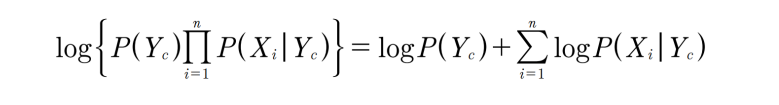

In [21]:
p_x_y_true = (x_data[ix_Y_True].sum(axis=0)) / sum(Y_data==True)
p_x_y_false = (x_data[ix_Y_False].sum(axis=0)) / sum(Y_data==False)
p_x_y_true, p_x_y_false

(array([0.16666667, 0.5       , 0.16666667, 0.16666667, 0.        ,
        0.16666667, 0.83333333, 0.        , 0.66666667, 0.33333333]),
 array([0.42857143, 0.28571429, 0.        , 0.28571429, 0.14285714,
        0.        , 0.85714286, 0.07142857, 0.78571429, 0.14285714]))

In [22]:
x_test = [0,1,0,0,0,1,0, 0,1,0]
p_y_true_test = P_Y_True + p_x_y_true.dot(x_test)
p_y_false_test = P_Y_False + p_x_y_false.dot(x_test)
p_y_true_test , p_y_false_test

(1.6333333333333333, 1.7714285714285714)

In [23]:
p_y_true_test < p_y_false_test

True